1. ### Part 1: Gauss Seidel and Conguate into Modules

In [1]:
#imports all needed libraries
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

#imports module with Cramer's, LUPivot, GuassPivot, GaussSeidel, and Conguate funtions
import aeromod as mod

In [2]:
#This function is the main calculation of the code. This calculates the cramer, LUpivot, and gausspivot of an a, b matrix pair.
#This function also calculates the time each takes to run as well as the accuracy or residual of the calcuation.
def matrix_compare(a,b):
    #cramer's rule
    timerStart = time.perf_counter() #Begin Timer
    cramer = mod.cramer(a.copy(), b.copy())
    timerEnd = time.perf_counter() #End timer
    cramerTime = timerEnd - timerStart #Calculates the difference on each system
    
    #LUPivot
    timerStart = time.perf_counter() #Begin Timer
    LUDecomp = mod.LUdecomp(a.copy())
    LUa, seq = LUDecomp
    LUsolve = mod.LUsolve(LUa.copy(), b.copy(), seq.copy())
    timerEnd = time.perf_counter() #End timer
    LUTime= timerEnd - timerStart #Calculates the difference on each system
    
    #gauss pivot
    timerStart = time.perf_counter() #Begin Timer
    gauss = mod.gaussPivot(a.copy(), b.copy())
    timerEnd = time.perf_counter() #End timer
    gaussTime= timerEnd - timerStart #Calculates the difference on each system

    #residuals: calculates the accuracy of each method by taking the dot product of the original solution and the solution to obtain a b-matrix. 
    #It then takes the product of the calculated b matrix and finds the difference with the real b matrix. Ideally it would be approaching or is zero. 
    #cramer residual
    x1 = np.zeros((len(b),1))
    x1 = np.dot(np.copy(a), cramer)
    cramer_acc = np.linalg.norm(x1 - np.copy(b))
    #LU residual
    x2 = np.zeros((len(b),1))
    x2 = np.dot(np.copy(a), LUsolve)
    LU_acc = np.linalg.norm(x2 - np.copy(b))
    #gauss residual
    x3 = np.zeros((len(b),1))
    x3 = np.dot(np.copy(a), gauss)
    gauss_acc = np.linalg.norm(x3 - np.copy(b))

    #returns all the values calculated in the function
    return cramer, gauss, LUsolve, cramerTime, gaussTime, LUTime, cramer_acc, gauss_acc, LU_acc

In [3]:
#calculates the iterative equations that will be used in gaussSeidel
def IterEqs(x,omega):
    x[0]= omega/3*(10+(2*x[1]-x[2]-x[5]))+(1-omega)*x[0]
    x[1]= omega/4*(-8+(2*x[0]+2*x[2]-x[3]))+(1-omega)*x[1]
    x[2]= omega/4*(10+(-x[0]+2*x[1]+2*x[3]-x[4]))+(1-omega)*x[2]
    x[3]= omega/4*(10+(-x[1]+2*x[2]+2*x[4]-x[5]))+(1-omega)*x[3]
    x[4]= omega/4*(-8+(-x[2]+2*x[3]+2*x[5]))+(1-omega)*x[4]
    x[5]= omega/3*(10+(-x[0]-x[3]+2*x[4]))+(1-omega)*x[5]
    return x

In [4]:
#calculates the components of vector Ax(v) 
# define Av for conj of homework section 2.3, problem 16
def AxProblem16(v):
    len_a = len(a)
    Av = np.zeros(len_a)
    Av[0] = 3 * v[0] - 2 * v[1] + v[2] + v[5]
    Av[1] = -2 * v[0] + 4 * v[1] - 2 * v[2] + v[3]
    Av[2] = v[0] - 2 * v[1] + 4 * v[2] - 2 * v[3] + v[4]
    Av[3] = v[1] - 2 * v[2] + 4 * v[3] - 2 * v[4] + v[5]
    Av[4] = v[2] - 2 * v[3] + 4 * v[4] - 2 * v[5]
    Av[5] = v[0] + v[3] - 2 * v[4] + 3 * v[5]
    return Av

# define Av for conj of homework section 2.3, problem 18
def AxProblem18(v):
    n = len(v)
    Ax = np.zeros(n)
    Ax[0] = 4.0*v[0] - v[1]+v[n-1]
    Ax[1:n-1] = -v[0:n-2] + 4.0*v[1:n-1] -v[2:n]
    Ax[n-1] = -v[n-2] + 4.0*v[n-1] + v[0]
    return Ax

In [5]:
# define a and b as functions so that the size can be changed
def sizedef(n):
    a = np.zeros((n, n), dtype="float64")
    for i in range(n):
        a[i, i] = 4.
        if i < (n-1):
            a[i, i+1] = -1.
            a[i+1, i] = -1.
    a[0, (n-1)] = 1.
    a[(n-1), 0] = 1.
    
    b = np.zeros((n, 1), dtype="float64")
    b[(n-1), 0] = 100.
    return a, b

2. ### Part 2: 3 Direct Values and 2 Iterative Comparison

In [6]:
#From text Problem Set 2.3 problem 16
a = np.array([
    [3, -2, 1, 0, 0, 1],
    [-2, 4, -2, 1, 0, 0],
    [1, -2, 4, -2, 1, 0],
    [0, 1, -2, 4, -2, 1],
    [0, 0, 1, -2, 4, -2],
    [1, 0, 0, 1, -2, 3]], dtype='float64')

b = np.array([[10],[-8],[10],[10],[-8],[10]], dtype='float64')

In [7]:
#calls prior function to calculated the a b matrix definied above
cramer, gauss, LUsolve, cramerTime, gaussTime, LUTime, cramer_acc, gauss_acc, LU_acc = matrix_compare(a,b)

#Ax(v)
len_a = len(a)
x = np.zeros(len_a)
x0 = -10*np.ones(len_a)
b = np.zeros(len_a)
b = np.array([10,-8,10,10,-8,10], dtype='float64')

timerStart = time.perf_counter() #Begin Timer
conjugate, numIter = mod.conjGrad(AxProblem16, x0, b, tol=1.0e-9)
timerEnd = time.perf_counter() #End timer
conjugateTime = timerEnd - timerStart #Calculates the difference on each system
conjugate_acc = np.linalg.norm(np.dot(a.copy(), conjugate.copy()) - b.copy())
conjugate = np.transpose([conjugate]) #Switches from row vector to column for consistency on the table

#Gauss Siedel
x = np.zeros(6)
x0 = -100*np.ones(6)
b = np.zeros(6)
b = np.array([10,-8,10,10,-8,10], dtype='float64')
timerStart = time.perf_counter() #Begin Timer
x, numIter, omega = mod.gaussSeidel(IterEqs, x0, tol = 1.0e-12)
timerEnd = time.perf_counter() #End timer
gaussSeidelTime = timerEnd - timerStart #Calculates the difference on each system
Seidel_acc = np.linalg.norm(np.dot(a.copy(), x.copy()) - b.copy())

#dataframe for comparing the residuals and time of each method. 
preformance_comparison = {"Method": ["Cramer", "LU Pivot", "Gauss", "Gauss Seidel", "Conjugate"], "Residual": [cramer_acc, LU_acc, gauss_acc, Seidel_acc, conjugate_acc], "Time":[cramerTime, LUTime, gaussTime, gaussSeidelTime,conjugateTime]}
preformance_comparison_table = pd.DataFrame(preformance_comparison)
preformance_comparison_table = preformance_comparison_table.style.set_table_styles([{'selector': 'th, td', 'props': [('text-align', 'center')]}])
preformance_comparison_table

,Method,Residual,Time
0,Cramer,0.000000,0.000528
1,LU Pivot,0.000000,0.000394
2,Gauss,0.000000,0.000181
3,Gauss Seidel,0.000000,0.000914
4,Conjugate,0.000000,0.000236


3. ### Part 3: Solving N = 10, 100, and 1000 using Gauss Seidel Iteration

In [8]:
def iterEqs(x, omega):
    n = len(x)
    x[0] = omega*(x[1] - x[n-1])/4.0 + (1.0 - omega)*x[0]
    for i in range(1, n-1):
        x[i] = omega*(x[i-1] + x[i+1])/4.0 + (1.0 - omega)*x[i]
    x[n-1] = omega*(100. - x[0] + x[n-2])/4.0 \
        + (1.0 - omega)*x[n-1]
    return x

# Given test values from textbook
numbers = [10,100,1000]
# Initialize an empty list to store numbers
GaussSeidelnumIterList = []
GaussSeidel_accList = []
GaussSeidelTimeList = []

for i in numbers:
    a, b = sizedef(i)
    x = np.zeros(i)
    b = np.zeros(i)
    b[(i-1)] = 100
    
    t0 = time.perf_counter()
    gaussSeidel,numIter,omega = mod.gaussSeidel(iterEqs,x)
    gaussSeideltime = time.perf_counter() - t0
    gaussSeidelacc = np.linalg.norm(np.dot(a.copy(), gaussSeidel.copy()) - b.copy())
    
    GaussSeidelnumIterList.append(numIter)
    GaussSeidel_accList.append(gaussSeidelacc)
    GaussSeidelTimeList.append(gaussSeideltime)

preformance_comparison = {"Matrix Size (Gauss-Seidel)": ["10", "100", "1000"],
        "Gauss-Seidel Accuracy": [GaussSeidel_accList[0], GaussSeidel_accList[1], GaussSeidel_accList[2]],
        "Gauss-Seidel Time": [GaussSeidelTimeList[0], GaussSeidelTimeList[1], GaussSeidelTimeList[2]],
        "Number of Iterations": [GaussSeidelnumIterList[0], GaussSeidelnumIterList[1], GaussSeidelnumIterList[2]]}
preformance_comparison_table = pd.DataFrame(preformance_comparison)
preformance_comparison_table = preformance_comparison_table.style.set_table_styles([{'selector': 'th, td', 'props': [('text-align', 'center')]}])
preformance_comparison_table

,Matrix Size (Gauss-Seidel),Gauss-Seidel Accuracy,Gauss-Seidel Time,Number of Iterations
0,10,0.000000,0.000278,20
1,100,0.000000,0.002007,21
2,1000,0.000000,0.026359,21


4. ### Part 4: Solving N = 10, 100, and 1000 using Conjugate Iteration

In [9]:
# Given test values from textbook
numbers = [10,100,1000]
# Initialize an empty list to store numbers
ConjugatenumIterList = []
conjugate_accList = []
conjugateTimeList = []

for i in numbers:
    a, b = sizedef(i)
    x = np.zeros(i)
    b = np.zeros(i)
    b[(i-1)] = 100
    
    timerStart = time.perf_counter() #Begin Timer
    conjugate, numIter = mod.conjGrad(AxProblem18, x, b, tol=1.0e-9)
    timerEnd = time.perf_counter() #End timer
    conjugateTime = timerEnd - timerStart #Calculates the difference on each system
    conjugate_acc = np.linalg.norm(np.dot(a.copy(), conjugate.copy()) - b.copy())
    conjugate = np.transpose([conjugate]) #Switches from row vector to column for consistency on the table

    ConjugatenumIterList.append(numIter)
    conjugate_accList.append(conjugate_acc)
    conjugateTimeList.append(conjugateTime)

preformance_comparison = {"Matrix Size (Conjugate)": ["10", "100", "1000"],
        "Conjugate Accuracy": [conjugate_accList[0], conjugate_accList[1], conjugate_accList[2]],
        "Conjugate Time": [conjugateTimeList[0], conjugateTimeList[1], conjugateTimeList[2]],
        "Number of Iterations": [ConjugatenumIterList[0], ConjugatenumIterList[1], ConjugatenumIterList[2]]}
preformance_comparison_table = pd.DataFrame(preformance_comparison)
preformance_comparison_table = preformance_comparison_table.style.set_table_styles([{'selector': 'th, td', 'props': [('text-align', 'center')]}])
preformance_comparison_table

,Matrix Size (Conjugate),Conjugate Accuracy,Conjugate Time,Number of Iterations
0,10,0.000000,0.000332,4
1,100,0.000000,0.000434,19
2,1000,0.000000,0.000965,19


5. ### Method Comparison

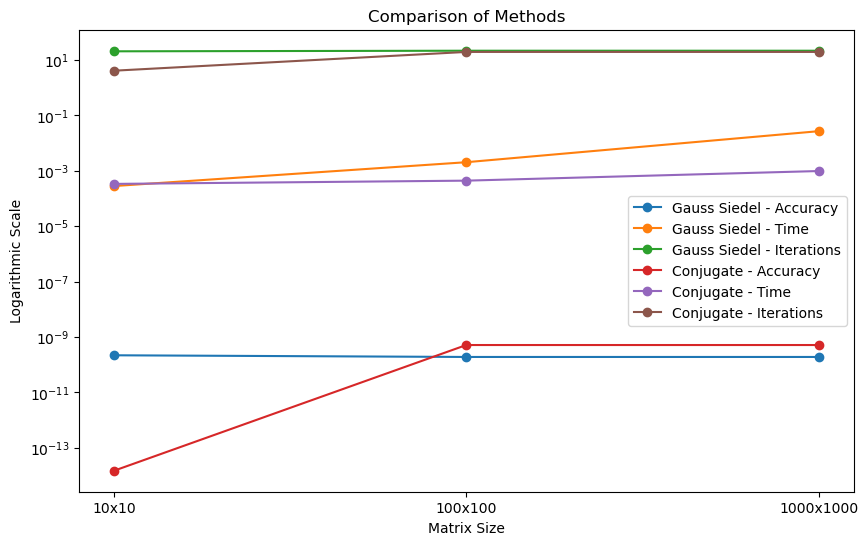

The plot provides a comparison between the Gauss Siedel and Conjugate numerical methods, evaluating their performance across three different matrix sizes (10x10, 100x100, 1000x1000) based on three key metrics. Accuracy reflects how close the numerical solutions are to the exact solution, with lower values indicating higher accuracy. Time represents the computational time required by each method, where lower values are desirable for faster computation. Iterations denote the number of steps each method takes to converge to a solution, and fewer iterations suggest more efficient convergence. Analyzing the plot helps in making informed decisions about method selection, considering the trade-offs between accuracy, computational time, and convergence efficiency for specific linear system-solving applications.


In [10]:
import matplotlib.pyplot as plt

methodComparison = {
    ('Gauss Siedel', 'Accuracy'): [GaussSeidel_accList[0], GaussSeidel_accList[1], GaussSeidel_accList[2]],
    ('Gauss Siedel', 'Time'): [GaussSeidelTimeList[0], GaussSeidelTimeList[1], GaussSeidelTimeList[2]],
    ('Gauss Siedel', 'Iterations'): [GaussSeidelnumIterList[0], GaussSeidelnumIterList[1], GaussSeidelnumIterList[2]],
    ('Conjugate', 'Accuracy'): [conjugate_accList[0], conjugate_accList[1], conjugate_accList[2]],
    ('Conjugate', 'Time'): [conjugateTimeList[0], conjugateTimeList[1], conjugateTimeList[2]],
    ('Conjugate', 'Iterations'): [ConjugatenumIterList[0], ConjugatenumIterList[1], ConjugatenumIterList[2]],
}

sizes = ['10x10', '100x100', '1000x1000']

# Create a single log plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot all three metrics for each method
for method, metric in methodComparison:
    ax.plot(sizes, methodComparison[(method, metric)], label=f'{method} - {metric}', marker='o')

ax.set_yscale('log')
ax.set_title('Comparison of Methods')
ax.set_xlabel('Matrix Size')
ax.set_ylabel('Logarithmic Scale')
ax.legend()
plt.show()

methodComparisonTable = pd.DataFrame(methodComparison, index=sizes)
methodComparisonTable = methodComparisonTable.style.set_table_styles([{'selector': 'th, td', 'props': [('text-align', 'center')]}])

print("The plot provides a comparison between the Gauss Siedel and Conjugate numerical methods, evaluating their performance across three different matrix sizes (10x10, 100x100, 1000x1000) based on three key metrics. Accuracy reflects how close the numerical solutions are to the exact solution, with lower values indicating higher accuracy. Time represents the computational time required by each method, where lower values are desirable for faster computation. Iterations denote the number of steps each method takes to converge to a solution, and fewer iterations suggest more efficient convergence. Analyzing the plot helps in making informed decisions about method selection, considering the trade-offs between accuracy, computational time, and convergence efficiency for specific linear system-solving applications.")
methodComparisonTable













